In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv("coffee.csv")
df



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/6/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/6/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/6/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/6/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [5]:

# Calculate the total orders for each product type
total_orders = df.groupby(['product_category', 'product_type', 'product_id'])['transaction_qty'].sum().reset_index()

# Renaming the column for clarity
total_orders.rename(columns={'transaction_qty': 'total_order'}, inplace=True)

# Dropping 'product_id' since it's not needed for the plot
total_orders = total_orders.drop(columns=['product_id'])

# Grouping again to sum the total_order for products with the same name but different IDs
total_orders = total_orders.groupby(['product_category', 'product_type'])['total_order'].sum().reset_index()

total_orders



,product_category,product_type,total_order
0,Bakery,Biscotti,5788
1,Bakery,Pastry,6961
2,Bakery,Scone,10465
3,Branded,Clothing,221
4,Branded,Housewares,555
5,Coffee,Barista Espresso,24943
6,Coffee,Drip coffee,12891
7,Coffee,Gourmet brewed coffee,25973
8,Coffee,Organic brewed coffee,13012
9,Coffee,Premium brewed coffee,12431


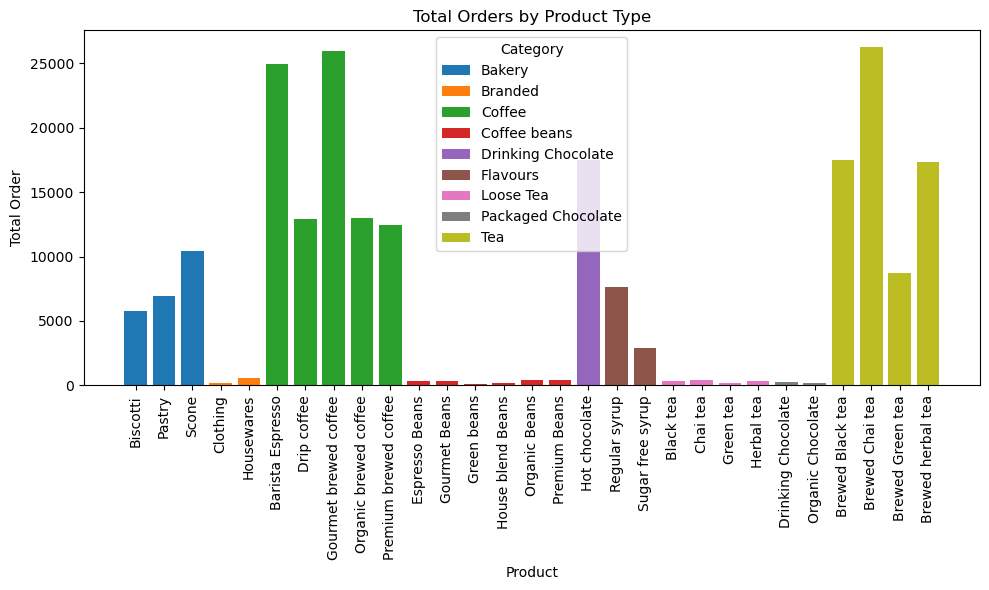

In [3]:
# Plotting the results
plt.figure(figsize=(10, 6))
for category in total_orders['product_category'].unique():
    data = total_orders[total_orders['product_category'] == category]
    plt.bar(data['product_type'], data['total_order'], label=category)

plt.xlabel('Product')
plt.ylabel('Total Order')
plt.title('Total Orders by Product Type')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.tight_layout()
plt.show()